V.1: Exploring the green reds

a)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

/nfs/2017/s/ssong/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/nfs/2017/s/ssong/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_csv("input/winequality-red.csv")
data.shape

(1599, 12)

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
data.shape

(1599, 12)

In [6]:
def plot_scatter_matrix(data, good_threshold, bad_threshold):
    
#     #take out the quality column
#     good_data = good_data.drop('quality', 1)
#     bad_data = bad_data.drop('quality', 1)

    names = data.columns
    good_data = data.loc[data['quality'] >= good_threshold]
    bad_data = data.loc[data['quality'] <= bad_threshold]

    
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numdata, ncols=numdata, figsize=(20,20))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    
    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

    # Plot the data.
    for i in range(0, numdata):
        for j in range(0, numdata):
            if (i != j):
                for x, y in [(i,j), (j,i)]:
                    #iloc allows me to grab by index so when I'm plotting it just uses the column index and plots them.
                    axes[x,y].plot(bad_data.iloc[:, y], bad_data.iloc[:, x], linestyle='none', marker='.', color='red', mfc='none')
                    axes[x,y].plot(good_data.iloc[:, y], good_data.iloc[:, x], linestyle='none', marker='.', color='green', mfc='none')

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    return fig


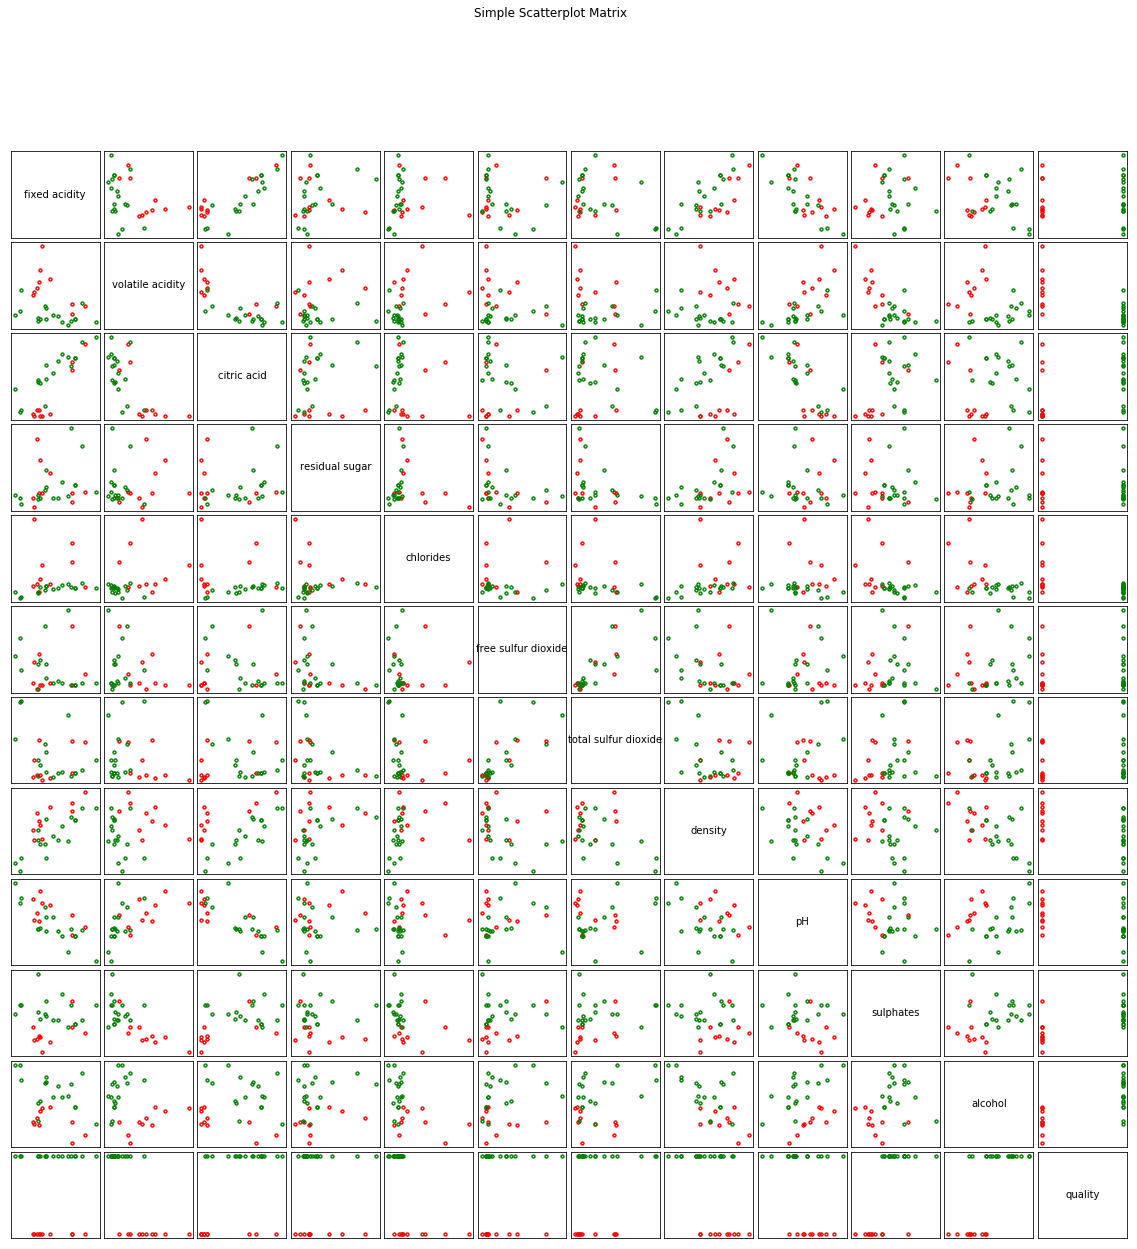

In [7]:
good_threshold = 8  
bad_threshold = 3

fig = plot_scatter_matrix(data,good_threshold,bad_threshold)
fig.suptitle('Simple Scatterplot Matrix')
plt.show()

b) Observations:
 1-Dimensional Analysis
 
    
    1) Lower volatile acidity trended to higher quality
    2) Low chlorides led trended to higher quality
    3) Higher alcohol content trended to higher quality
    4) Higher sulphates trended to higher quality
    5) Lower density trended to higher quality
    6) Lower pH trended to higher quality
    7) Most low quality wines had low citric acid
    8) Lower Sulfer dioxide trended to lower quality
 
 2-Dimensional Analysis
    * plots with greater separation between green and red show that these two factors have a relationship to quality 
    * poolings of green or red are also good indicators to relationship of quality
    
    1) Higher alcohol content with low volatile acidity led to higher ratings
    2) Lower Density and higher citric acid showed a trended to higher ratings
    3) High citric acid and low chlorides showed higher ratings
    
I think that volatile acidity, chlorids, sulphates, and alcohol content will be the most useful factors in deciding quality of wine because of the severity of their grouping and large disparity between high and low wines.
    

V.2 Learning to Perceptron

a) Implement a perceptron that:
    
       * Has randomly initialized weights and bias
       * Uses the Rosenblatt perceptron learning rule (with changeable learning rate)
       * Utilizes the heaviside step activation function (discrete version)

Predictions

Formula for activation function:
    * activation = (weight(0) * X(0)) + (weight(n) * x(n)) + bias

Heaviside step activation function:
    * if activation is > 1 then it predicts 1 if else returns 0.
    * simple binary classification

In [8]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        #iterate through inputs and multiply them to corresponding weights
        activation += weights[i + 1] * row[i]
        
    #use a transfer function to change value to 1 or 0.
    return 1.0 if activation >= 0.0 else 0.0

Training

There are 3 loops we need to perform in the function:

    1) Loop over each epoch.
    2) Loop over each row in the training data per epoch.
    3) Loop over each weight per feature in row.

In [9]:
# Estimate Perceptron weights using stochastic gradient descent

#The perceptron learning rule basically just adds the actual value 
def train_weights(train, l_rate, n_epoch):
    performance = []

    #random weights
    weights = [random.uniform(0, 1) for i in range(len(train[0]))]
    
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += abs(error)
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row) - 1):
                if (error > 0):
                    weights[i + 1] = weights[i + 1] + (l_rate * row[i])
                elif (error < 0):
                    weights[i + 1] = weights[i + 1] - (l_rate * row[i])
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        performance.append((epoch, sum_error, weights[1:], weights[0]))
    if n_epoch <= 0:
        epoch = 0
        sum_error = 1.0
        while sum_error != 0:
            sum_error = 0.0
            for row in train:
                prediction = predict(row, weights)
                error = row[-1] - prediction
                sum_error += abs(error)
                weights[0] = weights[0] + l_rate * error
                for i in range(len(row) - 1):
                    if (error > 0):
                        weights[i + 1] = weights[i + 1] + (l_rate * row[i])
                    elif (error < 0):
                        weights[i + 1] = weights[i + 1] - (l_rate * row[i])
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))            
            performance.append((epoch, sum_error, weights[1:], weights[0]))
            epoch += 1 
    print(weights)
    return performance

In [10]:
def dataframe_to_list(data, good_threshold, bad_threshold, columns):
    new_data = data.copy()

    #Covert all labels to 1 or 0 with threshold of good and bad
    new_data['good_bad'] = [1 if x >= good_threshold else 0 for x in new_data['quality']]

    #Grab all data higher than 8 or lower than 3 in quality.
    new_data = new_data.loc[(data['quality'] >= good_threshold) | (data['quality'] <= bad_threshold)]

    #Grab only the 3 columns
    test_train = new_data.loc[:, columns]
    test_train = test_train.values.tolist()
    return (test_train)


In [11]:
test_train = dataframe_to_list(data, good_threshold=8, bad_threshold=3, columns=['pH', 'alcohol', 'good_bad'])
# test_train

In [12]:
performance = train_weights(test_train, l_rate=5, n_epoch=0)

>epoch=0, lrate=5.000, error=13.000
>epoch=1, lrate=5.000, error=13.000
>epoch=2, lrate=5.000, error=11.000
>epoch=3, lrate=5.000, error=11.000
>epoch=4, lrate=5.000, error=11.000
>epoch=5, lrate=5.000, error=13.000
>epoch=6, lrate=5.000, error=11.000
>epoch=7, lrate=5.000, error=9.000
>epoch=8, lrate=5.000, error=4.000
>epoch=9, lrate=5.000, error=6.000
>epoch=10, lrate=5.000, error=7.000
>epoch=11, lrate=5.000, error=6.000
>epoch=12, lrate=5.000, error=6.000
>epoch=13, lrate=5.000, error=9.000
>epoch=14, lrate=5.000, error=2.000
>epoch=15, lrate=5.000, error=2.000
>epoch=16, lrate=5.000, error=4.000
>epoch=17, lrate=5.000, error=6.000
>epoch=18, lrate=5.000, error=9.000
>epoch=19, lrate=5.000, error=2.000
>epoch=20, lrate=5.000, error=2.000
>epoch=21, lrate=5.000, error=4.000
>epoch=22, lrate=5.000, error=6.000
>epoch=23, lrate=5.000, error=8.000
>epoch=24, lrate=5.000, error=9.000
>epoch=25, lrate=5.000, error=8.000
>epoch=26, lrate=5.000, error=7.000
>epoch=27, lrate=5.000, error=6

>epoch=1410, lrate=5.000, error=2.000
>epoch=1411, lrate=5.000, error=2.000
>epoch=1412, lrate=5.000, error=2.000
>epoch=1413, lrate=5.000, error=2.000
>epoch=1414, lrate=5.000, error=2.000
>epoch=1415, lrate=5.000, error=2.000
>epoch=1416, lrate=5.000, error=2.000
>epoch=1417, lrate=5.000, error=2.000
>epoch=1418, lrate=5.000, error=2.000
>epoch=1419, lrate=5.000, error=2.000
>epoch=1420, lrate=5.000, error=2.000
>epoch=1421, lrate=5.000, error=2.000
>epoch=1422, lrate=5.000, error=2.000
>epoch=1423, lrate=5.000, error=2.000
>epoch=1424, lrate=5.000, error=2.000
>epoch=1425, lrate=5.000, error=2.000
>epoch=1426, lrate=5.000, error=2.000
>epoch=1427, lrate=5.000, error=2.000
>epoch=1428, lrate=5.000, error=1.000
>epoch=1429, lrate=5.000, error=2.000
>epoch=1430, lrate=5.000, error=2.000
>epoch=1431, lrate=5.000, error=2.000
>epoch=1432, lrate=5.000, error=2.000
>epoch=1433, lrate=5.000, error=2.000
>epoch=1434, lrate=5.000, error=2.000
>epoch=1435, lrate=5.000, error=2.000
>epoch=1436,

>epoch=2410, lrate=5.000, error=2.000
>epoch=2411, lrate=5.000, error=1.000
>epoch=2412, lrate=5.000, error=2.000
>epoch=2413, lrate=5.000, error=2.000
>epoch=2414, lrate=5.000, error=2.000
>epoch=2415, lrate=5.000, error=2.000
>epoch=2416, lrate=5.000, error=2.000
>epoch=2417, lrate=5.000, error=2.000
>epoch=2418, lrate=5.000, error=2.000
>epoch=2419, lrate=5.000, error=2.000
>epoch=2420, lrate=5.000, error=2.000
>epoch=2421, lrate=5.000, error=2.000
>epoch=2422, lrate=5.000, error=2.000
>epoch=2423, lrate=5.000, error=2.000
>epoch=2424, lrate=5.000, error=2.000
>epoch=2425, lrate=5.000, error=2.000
>epoch=2426, lrate=5.000, error=2.000
>epoch=2427, lrate=5.000, error=2.000
>epoch=2428, lrate=5.000, error=2.000
>epoch=2429, lrate=5.000, error=2.000
>epoch=2430, lrate=5.000, error=2.000
>epoch=2431, lrate=5.000, error=2.000
>epoch=2432, lrate=5.000, error=2.000
>epoch=2433, lrate=5.000, error=1.000
>epoch=2434, lrate=5.000, error=2.000
>epoch=2435, lrate=5.000, error=2.000
>epoch=2436,

>epoch=3724, lrate=5.000, error=2.000
>epoch=3725, lrate=5.000, error=2.000
>epoch=3726, lrate=5.000, error=2.000
>epoch=3727, lrate=5.000, error=2.000
>epoch=3728, lrate=5.000, error=2.000
>epoch=3729, lrate=5.000, error=2.000
>epoch=3730, lrate=5.000, error=2.000
>epoch=3731, lrate=5.000, error=2.000
>epoch=3732, lrate=5.000, error=2.000
>epoch=3733, lrate=5.000, error=2.000
>epoch=3734, lrate=5.000, error=1.000
>epoch=3735, lrate=5.000, error=2.000
>epoch=3736, lrate=5.000, error=2.000
>epoch=3737, lrate=5.000, error=2.000
>epoch=3738, lrate=5.000, error=2.000
>epoch=3739, lrate=5.000, error=2.000
>epoch=3740, lrate=5.000, error=2.000
>epoch=3741, lrate=5.000, error=2.000
>epoch=3742, lrate=5.000, error=2.000
>epoch=3743, lrate=5.000, error=2.000
>epoch=3744, lrate=5.000, error=2.000
>epoch=3745, lrate=5.000, error=2.000
>epoch=3746, lrate=5.000, error=2.000
>epoch=3747, lrate=5.000, error=2.000
>epoch=3748, lrate=5.000, error=2.000
>epoch=3749, lrate=5.000, error=2.000
>epoch=3750,

>epoch=4909, lrate=5.000, error=2.000
>epoch=4910, lrate=5.000, error=2.000
>epoch=4911, lrate=5.000, error=2.000
>epoch=4912, lrate=5.000, error=2.000
>epoch=4913, lrate=5.000, error=2.000
>epoch=4914, lrate=5.000, error=2.000
>epoch=4915, lrate=5.000, error=2.000
>epoch=4916, lrate=5.000, error=1.000
>epoch=4917, lrate=5.000, error=2.000
>epoch=4918, lrate=5.000, error=2.000
>epoch=4919, lrate=5.000, error=2.000
>epoch=4920, lrate=5.000, error=2.000
>epoch=4921, lrate=5.000, error=2.000
>epoch=4922, lrate=5.000, error=2.000
>epoch=4923, lrate=5.000, error=2.000
>epoch=4924, lrate=5.000, error=2.000
>epoch=4925, lrate=5.000, error=2.000
>epoch=4926, lrate=5.000, error=2.000
>epoch=4927, lrate=5.000, error=2.000
>epoch=4928, lrate=5.000, error=2.000
>epoch=4929, lrate=5.000, error=2.000
>epoch=4930, lrate=5.000, error=2.000
>epoch=4931, lrate=5.000, error=2.000
>epoch=4932, lrate=5.000, error=2.000
>epoch=4933, lrate=5.000, error=2.000
>epoch=4934, lrate=5.000, error=2.000
>epoch=4935,

>epoch=6000, lrate=5.000, error=2.000
>epoch=6001, lrate=5.000, error=2.000
>epoch=6002, lrate=5.000, error=2.000
>epoch=6003, lrate=5.000, error=2.000
>epoch=6004, lrate=5.000, error=2.000
>epoch=6005, lrate=5.000, error=1.000
>epoch=6006, lrate=5.000, error=2.000
>epoch=6007, lrate=5.000, error=2.000
>epoch=6008, lrate=5.000, error=2.000
>epoch=6009, lrate=5.000, error=2.000
>epoch=6010, lrate=5.000, error=2.000
>epoch=6011, lrate=5.000, error=2.000
>epoch=6012, lrate=5.000, error=2.000
>epoch=6013, lrate=5.000, error=2.000
>epoch=6014, lrate=5.000, error=2.000
>epoch=6015, lrate=5.000, error=2.000
>epoch=6016, lrate=5.000, error=2.000
>epoch=6017, lrate=5.000, error=2.000
>epoch=6018, lrate=5.000, error=2.000
>epoch=6019, lrate=5.000, error=2.000
>epoch=6020, lrate=5.000, error=2.000
>epoch=6021, lrate=5.000, error=2.000
>epoch=6022, lrate=5.000, error=2.000
>epoch=6023, lrate=5.000, error=2.000
>epoch=6024, lrate=5.000, error=1.000
>epoch=6025, lrate=5.000, error=2.000
>epoch=6026,

>epoch=6929, lrate=5.000, error=2.000
>epoch=6930, lrate=5.000, error=2.000
>epoch=6931, lrate=5.000, error=2.000
>epoch=6932, lrate=5.000, error=2.000
>epoch=6933, lrate=5.000, error=2.000
>epoch=6934, lrate=5.000, error=2.000
>epoch=6935, lrate=5.000, error=2.000
>epoch=6936, lrate=5.000, error=2.000
>epoch=6937, lrate=5.000, error=2.000
>epoch=6938, lrate=5.000, error=2.000
>epoch=6939, lrate=5.000, error=2.000
>epoch=6940, lrate=5.000, error=2.000
>epoch=6941, lrate=5.000, error=2.000
>epoch=6942, lrate=5.000, error=2.000
>epoch=6943, lrate=5.000, error=2.000
>epoch=6944, lrate=5.000, error=1.000
>epoch=6945, lrate=5.000, error=2.000
>epoch=6946, lrate=5.000, error=2.000
>epoch=6947, lrate=5.000, error=2.000
>epoch=6948, lrate=5.000, error=2.000
>epoch=6949, lrate=5.000, error=2.000
>epoch=6950, lrate=5.000, error=2.000
>epoch=6951, lrate=5.000, error=2.000
>epoch=6952, lrate=5.000, error=2.000
>epoch=6953, lrate=5.000, error=2.000
>epoch=6954, lrate=5.000, error=2.000
>epoch=6955,

>epoch=8407, lrate=5.000, error=2.000
>epoch=8408, lrate=5.000, error=1.000
>epoch=8409, lrate=5.000, error=2.000
>epoch=8410, lrate=5.000, error=2.000
>epoch=8411, lrate=5.000, error=2.000
>epoch=8412, lrate=5.000, error=2.000
>epoch=8413, lrate=5.000, error=2.000
>epoch=8414, lrate=5.000, error=2.000
>epoch=8415, lrate=5.000, error=2.000
>epoch=8416, lrate=5.000, error=2.000
>epoch=8417, lrate=5.000, error=2.000
>epoch=8418, lrate=5.000, error=2.000
>epoch=8419, lrate=5.000, error=2.000
>epoch=8420, lrate=5.000, error=2.000
>epoch=8421, lrate=5.000, error=2.000
>epoch=8422, lrate=5.000, error=2.000
>epoch=8423, lrate=5.000, error=2.000
>epoch=8424, lrate=5.000, error=2.000
>epoch=8425, lrate=5.000, error=2.000
>epoch=8426, lrate=5.000, error=2.000
>epoch=8427, lrate=5.000, error=1.000
>epoch=8428, lrate=5.000, error=2.000
>epoch=8429, lrate=5.000, error=2.000
>epoch=8430, lrate=5.000, error=2.000
>epoch=8431, lrate=5.000, error=2.000
>epoch=8432, lrate=5.000, error=2.000
>epoch=8433,

>epoch=9668, lrate=5.000, error=2.000
>epoch=9669, lrate=5.000, error=2.000
>epoch=9670, lrate=5.000, error=2.000
>epoch=9671, lrate=5.000, error=2.000
>epoch=9672, lrate=5.000, error=2.000
>epoch=9673, lrate=5.000, error=2.000
>epoch=9674, lrate=5.000, error=2.000
>epoch=9675, lrate=5.000, error=2.000
>epoch=9676, lrate=5.000, error=2.000
>epoch=9677, lrate=5.000, error=2.000
>epoch=9678, lrate=5.000, error=2.000
>epoch=9679, lrate=5.000, error=2.000
>epoch=9680, lrate=5.000, error=2.000
>epoch=9681, lrate=5.000, error=2.000
>epoch=9682, lrate=5.000, error=2.000
>epoch=9683, lrate=5.000, error=2.000
>epoch=9684, lrate=5.000, error=1.000
>epoch=9685, lrate=5.000, error=2.000
>epoch=9686, lrate=5.000, error=2.000
>epoch=9687, lrate=5.000, error=2.000
>epoch=9688, lrate=5.000, error=2.000
>epoch=9689, lrate=5.000, error=2.000
>epoch=9690, lrate=5.000, error=2.000
>epoch=9691, lrate=5.000, error=2.000
>epoch=9692, lrate=5.000, error=2.000
>epoch=9693, lrate=5.000, error=2.000
>epoch=9694,

>epoch=10906, lrate=5.000, error=2.000
>epoch=10907, lrate=5.000, error=2.000
>epoch=10908, lrate=5.000, error=2.000
>epoch=10909, lrate=5.000, error=2.000
>epoch=10910, lrate=5.000, error=2.000
>epoch=10911, lrate=5.000, error=2.000
>epoch=10912, lrate=5.000, error=2.000
>epoch=10913, lrate=5.000, error=2.000
>epoch=10914, lrate=5.000, error=2.000
>epoch=10915, lrate=5.000, error=2.000
>epoch=10916, lrate=5.000, error=2.000
>epoch=10917, lrate=5.000, error=2.000
>epoch=10918, lrate=5.000, error=2.000
>epoch=10919, lrate=5.000, error=2.000
>epoch=10920, lrate=5.000, error=2.000
>epoch=10921, lrate=5.000, error=2.000
>epoch=10922, lrate=5.000, error=2.000
>epoch=10923, lrate=5.000, error=1.000
>epoch=10924, lrate=5.000, error=2.000
>epoch=10925, lrate=5.000, error=2.000
>epoch=10926, lrate=5.000, error=2.000
>epoch=10927, lrate=5.000, error=2.000
>epoch=10928, lrate=5.000, error=2.000
>epoch=10929, lrate=5.000, error=2.000
>epoch=10930, lrate=5.000, error=2.000
>epoch=10931, lrate=5.000

>epoch=12145, lrate=5.000, error=2.000
>epoch=12146, lrate=5.000, error=2.000
>epoch=12147, lrate=5.000, error=2.000
>epoch=12148, lrate=5.000, error=2.000
>epoch=12149, lrate=5.000, error=2.000
>epoch=12150, lrate=5.000, error=2.000
>epoch=12151, lrate=5.000, error=2.000
>epoch=12152, lrate=5.000, error=2.000
>epoch=12153, lrate=5.000, error=2.000
>epoch=12154, lrate=5.000, error=2.000
>epoch=12155, lrate=5.000, error=2.000
>epoch=12156, lrate=5.000, error=2.000
>epoch=12157, lrate=5.000, error=2.000
>epoch=12158, lrate=5.000, error=2.000
>epoch=12159, lrate=5.000, error=2.000
>epoch=12160, lrate=5.000, error=2.000
>epoch=12161, lrate=5.000, error=2.000
>epoch=12162, lrate=5.000, error=1.000
>epoch=12163, lrate=5.000, error=2.000
>epoch=12164, lrate=5.000, error=2.000
>epoch=12165, lrate=5.000, error=2.000
>epoch=12166, lrate=5.000, error=2.000
>epoch=12167, lrate=5.000, error=2.000
>epoch=12168, lrate=5.000, error=2.000
>epoch=12169, lrate=5.000, error=2.000
>epoch=12170, lrate=5.000

Predictions on Test Data

In [13]:
# bias = performance[-1][3]
# weights = list(performance[-1][2])
# print(bias, weights)

# weights.insert(0, bias)
# print(weights)

In [14]:
# for row in test_train:
#     prediction = predict(row, weights)
#     print("Expected=%d, Predicted=%d" % (row[-1], prediction))

In [15]:
#Format (epoch, error, weights, bias)
print(performance[0])

(0, 13.0, [-16.853315245370382, 20.166362130157637], -4.058017560028581)


In [16]:
def frange(x, y, jump):
    while x < y:
        yield x
        x += jump

def eval_y_per_x(formula, x_values):
    y_values = []
    for x in x_values:
        y_values.append(eval(formula))
    return y_values

def graph(formula, wine_data, ax2):     
    x = wine_data.alcohol.tolist()
    x = [i for i in frange(min(x), max(x), .1)]
    y = eval_y_per_x(formula, x)
    d_min = [min(y) for l in range(0, len(x))]
    d_max = max(y)
    ax2.plot(x, y, linestyle='dashed', label='decision boundary')
    ax2.fill_between(x, y, d_min, facecolor='lightgreen', alpha=0.5)
    ax2.fill_between(x, y, d_max, facecolor='pink', alpha=0.5)

In [17]:
#if epoch is equal to -1 then it shows the line for last epoch
#please put a valid epoch under the number of epoch's attempted

def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch, save_plot=False):
    #Separate Data to good and bad wine depending on threshold
    good_data = wine_data.loc[data['quality'] >= good_thresh]
    bad_data = wine_data.loc[data['quality'] <= bad_thresh]
   
    listofepochs = [x[0] for x in performance]
    error = [x[1] for x in performance]
    
    #find length of epoch's so I can use last one if -1
    if (epoch >= len(listofepochs)):
        print("Please Put Valid Epoch. If you wish for last epoch put -1")
        return
    
    if (epoch < 0):
        epoch = len(listofepochs) - 1
        
    fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), ncols=2)
    ax1.plot(listofepochs, error)
    ax1.set_title('Error / Epoch Graph')
    ax1.set_ylabel('Sum_Error')
    ax1.set_xlabel('Epoch #')

    ax2.scatter(good_data.alcohol.tolist(), good_data.pH.tolist(), color = 'green', label='good')
    ax2.scatter(bad_data.alcohol.tolist(), bad_data.pH.tolist(), color = 'red', label='bad')
    formula = '({}*x + {})/-{}'.format(performance[epoch][2][1], performance[epoch][3], performance[epoch][2][0])

    graph(formula, wine_data, ax2)
    ax2.set_title('Decision boundary on epoch: {}'.format(epoch))
    ax2.set_ylabel('pH')
    ax2.set_xlabel('alcohol')
    ax2.legend()
    if (save_plot == True):
        plt.savefig('performance_graph.png')
    

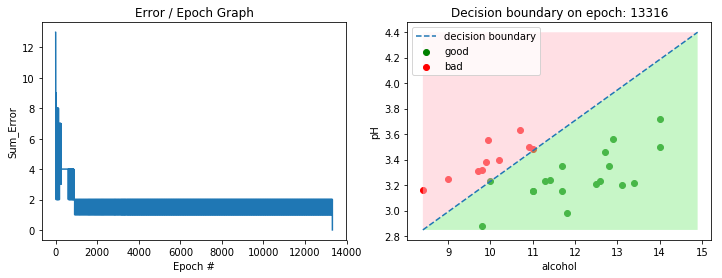

In [18]:
plot_performance(performance, data, 8, 3, -30, save_plot=False)

d) The reason it takes so many epochs to train is because the data is not normalized (or represented between 0 and 1). It takes alot longer for the bias and weights to calibrate for numbers that are larger than one. 


In [19]:
# #Feature Scaling
# #Function for normalizing is ((X - min) / (max - min))

# def normalize_data(data):
    

In [20]:
norm_data = data.copy()
features = [x for x in norm_data.columns]
for feature in features:
    maxim = norm_data[feature].max()
    minim = norm_data[feature].min()
    print(feature, maxim, minim)
    if feature != 'quality':
        norm_data[feature] = norm_data[feature].apply(lambda x: (x - minim) / (maxim - minim))
    
#Double Check if it was normalized
norm_data.describe()

fixed acidity 15.9 4.6
volatile acidity 1.58 0.12
citric acid 1.0 0.0
residual sugar 15.5 0.9
chlorides 0.611 0.012
free sulfur dioxide 72.0 1.0
total sulfur dioxide 289.0 6.0
density 1.00369 0.9900700000000001
pH 4.01 2.74
sulphates 2.0 0.33
alcohol 14.9 8.4
quality 8 3


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,5.636023
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.807569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,5.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,6.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [21]:
def dataframe_to_list(data, good_threshold, bad_threshold, columns):
    new_data = data.copy()

    #Covert all labels to 1 or 0 with threshold of good and bad
    new_data['good_bad'] = [1 if x >= good_threshold else 0 for x in new_data['quality']]

    #Grab all data higher than 8 or lower than 3 in quality.
    new_data = new_data.loc[(data['quality'] >= good_threshold) | (data['quality'] <= bad_threshold)]

    #Grab only the 3 columns
    test_train = new_data.loc[:, columns]
    test_train = test_train.values.tolist()
    return (test_train)


In [22]:
norm_train = dataframe_to_list(norm_data, 8, 3, ['pH', 'alcohol', 'good_bad'])

In [23]:
norm_train

[[0.48031496062992135, 0.676923076923077, 1.0],
 [0.38582677165354323, 0.6461538461538461, 1.0],
 [0.6456692913385828, 0.6923076923076923, 1.0],
 [0.11023622047244074, 0.21538461538461545, 1.0],
 [0.3779527559055119, 0.7692307692307693, 1.0],
 [0.40157480314960625, 0.09230769230769226, 0.0],
 [0.3228346456692912, 0.5076923076923076, 1.0],
 [0.3228346456692912, 0.39999999999999997, 1.0],
 [0.3228346456692912, 0.39999999999999997, 1.0],
 [0.3307086614173229, 0.0, 0.0],
 [0.7716535433070869, 0.8615384615384615, 1.0],
 [0.7007874015748031, 0.3538461538461537, 0.0],
 [0.5669291338582677, 0.6615384615384614, 1.0],
 [0.5039370078740156, 0.23076923076923078, 0.0],
 [0.5826771653543307, 0.39999999999999997, 0.0],
 [0.37007874015748027, 0.6307692307692307, 1.0],
 [0.1889763779527558, 0.5230769230769231, 1.0],
 [0.3622047244094489, 0.723076923076923, 1.0],
 [0.48031496062992135, 0.5076923076923076, 1.0],
 [0.5984251968503937, 0.8615384615384615, 1.0],
 [0.5984251968503937, 0.38461538461538464, 0.

In [24]:
l_rate = 5
n_epoch = 0
performance = train_weights(norm_train, l_rate, n_epoch)

>epoch=0, lrate=5.000, error=12.000
>epoch=1, lrate=5.000, error=5.000
>epoch=2, lrate=5.000, error=9.000
>epoch=3, lrate=5.000, error=8.000
>epoch=4, lrate=5.000, error=6.000
>epoch=5, lrate=5.000, error=4.000
>epoch=6, lrate=5.000, error=4.000
>epoch=7, lrate=5.000, error=4.000
>epoch=8, lrate=5.000, error=2.000
>epoch=9, lrate=5.000, error=2.000
>epoch=10, lrate=5.000, error=2.000
>epoch=11, lrate=5.000, error=2.000
>epoch=12, lrate=5.000, error=2.000
>epoch=13, lrate=5.000, error=2.000
>epoch=14, lrate=5.000, error=2.000
>epoch=15, lrate=5.000, error=2.000
>epoch=16, lrate=5.000, error=2.000
>epoch=17, lrate=5.000, error=2.000
>epoch=18, lrate=5.000, error=2.000
>epoch=19, lrate=5.000, error=2.000
>epoch=20, lrate=5.000, error=2.000
>epoch=21, lrate=5.000, error=2.000
>epoch=22, lrate=5.000, error=2.000
>epoch=23, lrate=5.000, error=2.000
>epoch=24, lrate=5.000, error=2.000
>epoch=25, lrate=5.000, error=2.000
>epoch=26, lrate=5.000, error=2.000
>epoch=27, lrate=5.000, error=2.000
>

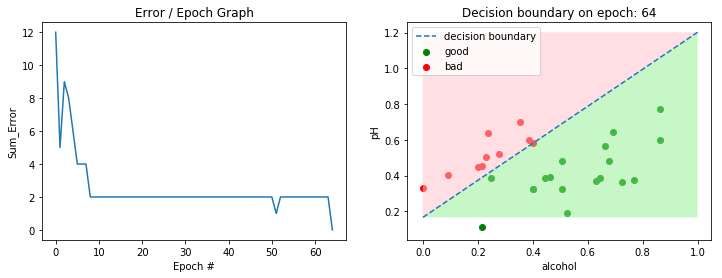

In [25]:
plot_performance(performance, norm_data, 8, 3, -1, save_plot=False)

V.3 My fair ADALINE

a) Results after lowering good threshold to 7 and raising bad threshold to 4
       
       * Look at the graph below and see how interlaced both datasets are. There is no way to make a linear classifier that can differentiate between the two without huge errors
       * Technical term is linearly inseparable problems

In [26]:
norm_train_new_threshold = dataframe_to_list(norm_data, good_threshold=7, bad_threshold=4, columns=['pH', 'alcohol', 'good_bad'])
print(len(norm_train_new_threshold))

280


In [27]:
performance = train_weights(norm_train_new_threshold, l_rate=.5, n_epoch=15000)

>epoch=0, lrate=0.500, error=56.000
>epoch=1, lrate=0.500, error=55.000
>epoch=2, lrate=0.500, error=48.000
>epoch=3, lrate=0.500, error=42.000
>epoch=4, lrate=0.500, error=50.000
>epoch=5, lrate=0.500, error=40.000
>epoch=6, lrate=0.500, error=46.000
>epoch=7, lrate=0.500, error=36.000
>epoch=8, lrate=0.500, error=34.000
>epoch=9, lrate=0.500, error=42.000
>epoch=10, lrate=0.500, error=46.000
>epoch=11, lrate=0.500, error=42.000
>epoch=12, lrate=0.500, error=36.000
>epoch=13, lrate=0.500, error=34.000
>epoch=14, lrate=0.500, error=40.000
>epoch=15, lrate=0.500, error=34.000
>epoch=16, lrate=0.500, error=36.000
>epoch=17, lrate=0.500, error=46.000
>epoch=18, lrate=0.500, error=42.000
>epoch=19, lrate=0.500, error=48.000
>epoch=20, lrate=0.500, error=40.000
>epoch=21, lrate=0.500, error=36.000
>epoch=22, lrate=0.500, error=36.000
>epoch=23, lrate=0.500, error=48.000
>epoch=24, lrate=0.500, error=40.000
>epoch=25, lrate=0.500, error=36.000
>epoch=26, lrate=0.500, error=36.000
>epoch=27, 

>epoch=305, lrate=0.500, error=48.000
>epoch=306, lrate=0.500, error=40.000
>epoch=307, lrate=0.500, error=42.000
>epoch=308, lrate=0.500, error=34.000
>epoch=309, lrate=0.500, error=36.000
>epoch=310, lrate=0.500, error=48.000
>epoch=311, lrate=0.500, error=40.000
>epoch=312, lrate=0.500, error=42.000
>epoch=313, lrate=0.500, error=34.000
>epoch=314, lrate=0.500, error=36.000
>epoch=315, lrate=0.500, error=48.000
>epoch=316, lrate=0.500, error=40.000
>epoch=317, lrate=0.500, error=42.000
>epoch=318, lrate=0.500, error=34.000
>epoch=319, lrate=0.500, error=36.000
>epoch=320, lrate=0.500, error=48.000
>epoch=321, lrate=0.500, error=40.000
>epoch=322, lrate=0.500, error=42.000
>epoch=323, lrate=0.500, error=34.000
>epoch=324, lrate=0.500, error=36.000
>epoch=325, lrate=0.500, error=48.000
>epoch=326, lrate=0.500, error=40.000
>epoch=327, lrate=0.500, error=42.000
>epoch=328, lrate=0.500, error=34.000
>epoch=329, lrate=0.500, error=36.000
>epoch=330, lrate=0.500, error=48.000
>epoch=331, 

>epoch=643, lrate=0.500, error=40.000
>epoch=644, lrate=0.500, error=42.000
>epoch=645, lrate=0.500, error=34.000
>epoch=646, lrate=0.500, error=36.000
>epoch=647, lrate=0.500, error=48.000
>epoch=648, lrate=0.500, error=40.000
>epoch=649, lrate=0.500, error=36.000
>epoch=650, lrate=0.500, error=36.000
>epoch=651, lrate=0.500, error=44.000
>epoch=652, lrate=0.500, error=46.000
>epoch=653, lrate=0.500, error=42.000
>epoch=654, lrate=0.500, error=36.000
>epoch=655, lrate=0.500, error=42.000
>epoch=656, lrate=0.500, error=48.000
>epoch=657, lrate=0.500, error=42.000
>epoch=658, lrate=0.500, error=36.000
>epoch=659, lrate=0.500, error=42.000
>epoch=660, lrate=0.500, error=48.000
>epoch=661, lrate=0.500, error=40.000
>epoch=662, lrate=0.500, error=36.000
>epoch=663, lrate=0.500, error=36.000
>epoch=664, lrate=0.500, error=48.000
>epoch=665, lrate=0.500, error=40.000
>epoch=666, lrate=0.500, error=42.000
>epoch=667, lrate=0.500, error=34.000
>epoch=668, lrate=0.500, error=36.000
>epoch=669, 

>epoch=1019, lrate=0.500, error=42.000
>epoch=1020, lrate=0.500, error=48.000
>epoch=1021, lrate=0.500, error=42.000
>epoch=1022, lrate=0.500, error=36.000
>epoch=1023, lrate=0.500, error=42.000
>epoch=1024, lrate=0.500, error=48.000
>epoch=1025, lrate=0.500, error=40.000
>epoch=1026, lrate=0.500, error=36.000
>epoch=1027, lrate=0.500, error=36.000
>epoch=1028, lrate=0.500, error=48.000
>epoch=1029, lrate=0.500, error=40.000
>epoch=1030, lrate=0.500, error=42.000
>epoch=1031, lrate=0.500, error=34.000
>epoch=1032, lrate=0.500, error=36.000
>epoch=1033, lrate=0.500, error=48.000
>epoch=1034, lrate=0.500, error=40.000
>epoch=1035, lrate=0.500, error=42.000
>epoch=1036, lrate=0.500, error=34.000
>epoch=1037, lrate=0.500, error=36.000
>epoch=1038, lrate=0.500, error=48.000
>epoch=1039, lrate=0.500, error=40.000
>epoch=1040, lrate=0.500, error=42.000
>epoch=1041, lrate=0.500, error=34.000
>epoch=1042, lrate=0.500, error=36.000
>epoch=1043, lrate=0.500, error=48.000
>epoch=1044, lrate=0.500,

>epoch=1385, lrate=0.500, error=42.000
>epoch=1386, lrate=0.500, error=36.000
>epoch=1387, lrate=0.500, error=42.000
>epoch=1388, lrate=0.500, error=48.000
>epoch=1389, lrate=0.500, error=40.000
>epoch=1390, lrate=0.500, error=36.000
>epoch=1391, lrate=0.500, error=36.000
>epoch=1392, lrate=0.500, error=48.000
>epoch=1393, lrate=0.500, error=40.000
>epoch=1394, lrate=0.500, error=42.000
>epoch=1395, lrate=0.500, error=34.000
>epoch=1396, lrate=0.500, error=36.000
>epoch=1397, lrate=0.500, error=48.000
>epoch=1398, lrate=0.500, error=40.000
>epoch=1399, lrate=0.500, error=42.000
>epoch=1400, lrate=0.500, error=34.000
>epoch=1401, lrate=0.500, error=36.000
>epoch=1402, lrate=0.500, error=48.000
>epoch=1403, lrate=0.500, error=40.000
>epoch=1404, lrate=0.500, error=42.000
>epoch=1405, lrate=0.500, error=34.000
>epoch=1406, lrate=0.500, error=36.000
>epoch=1407, lrate=0.500, error=48.000
>epoch=1408, lrate=0.500, error=40.000
>epoch=1409, lrate=0.500, error=42.000
>epoch=1410, lrate=0.500,

>epoch=1792, lrate=0.500, error=40.000
>epoch=1793, lrate=0.500, error=36.000
>epoch=1794, lrate=0.500, error=36.000
>epoch=1795, lrate=0.500, error=44.000
>epoch=1796, lrate=0.500, error=46.000
>epoch=1797, lrate=0.500, error=42.000
>epoch=1798, lrate=0.500, error=36.000
>epoch=1799, lrate=0.500, error=42.000
>epoch=1800, lrate=0.500, error=48.000
>epoch=1801, lrate=0.500, error=42.000
>epoch=1802, lrate=0.500, error=36.000
>epoch=1803, lrate=0.500, error=42.000
>epoch=1804, lrate=0.500, error=48.000
>epoch=1805, lrate=0.500, error=40.000
>epoch=1806, lrate=0.500, error=36.000
>epoch=1807, lrate=0.500, error=36.000
>epoch=1808, lrate=0.500, error=48.000
>epoch=1809, lrate=0.500, error=40.000
>epoch=1810, lrate=0.500, error=42.000
>epoch=1811, lrate=0.500, error=34.000
>epoch=1812, lrate=0.500, error=36.000
>epoch=1813, lrate=0.500, error=48.000
>epoch=1814, lrate=0.500, error=40.000
>epoch=1815, lrate=0.500, error=42.000
>epoch=1816, lrate=0.500, error=34.000
>epoch=1817, lrate=0.500,

>epoch=2083, lrate=0.500, error=48.000
>epoch=2084, lrate=0.500, error=40.000
>epoch=2085, lrate=0.500, error=42.000
>epoch=2086, lrate=0.500, error=34.000
>epoch=2087, lrate=0.500, error=36.000
>epoch=2088, lrate=0.500, error=48.000
>epoch=2089, lrate=0.500, error=40.000
>epoch=2090, lrate=0.500, error=42.000
>epoch=2091, lrate=0.500, error=34.000
>epoch=2092, lrate=0.500, error=36.000
>epoch=2093, lrate=0.500, error=48.000
>epoch=2094, lrate=0.500, error=40.000
>epoch=2095, lrate=0.500, error=42.000
>epoch=2096, lrate=0.500, error=34.000
>epoch=2097, lrate=0.500, error=36.000
>epoch=2098, lrate=0.500, error=48.000
>epoch=2099, lrate=0.500, error=40.000
>epoch=2100, lrate=0.500, error=42.000
>epoch=2101, lrate=0.500, error=34.000
>epoch=2102, lrate=0.500, error=36.000
>epoch=2103, lrate=0.500, error=48.000
>epoch=2104, lrate=0.500, error=40.000
>epoch=2105, lrate=0.500, error=36.000
>epoch=2106, lrate=0.500, error=36.000
>epoch=2107, lrate=0.500, error=44.000
>epoch=2108, lrate=0.500,

>epoch=2384, lrate=0.500, error=36.000
>epoch=2385, lrate=0.500, error=48.000
>epoch=2386, lrate=0.500, error=40.000
>epoch=2387, lrate=0.500, error=42.000
>epoch=2388, lrate=0.500, error=34.000
>epoch=2389, lrate=0.500, error=36.000
>epoch=2390, lrate=0.500, error=48.000
>epoch=2391, lrate=0.500, error=40.000
>epoch=2392, lrate=0.500, error=42.000
>epoch=2393, lrate=0.500, error=34.000
>epoch=2394, lrate=0.500, error=36.000
>epoch=2395, lrate=0.500, error=48.000
>epoch=2396, lrate=0.500, error=40.000
>epoch=2397, lrate=0.500, error=42.000
>epoch=2398, lrate=0.500, error=34.000
>epoch=2399, lrate=0.500, error=36.000
>epoch=2400, lrate=0.500, error=48.000
>epoch=2401, lrate=0.500, error=40.000
>epoch=2402, lrate=0.500, error=42.000
>epoch=2403, lrate=0.500, error=34.000
>epoch=2404, lrate=0.500, error=36.000
>epoch=2405, lrate=0.500, error=48.000
>epoch=2406, lrate=0.500, error=40.000
>epoch=2407, lrate=0.500, error=42.000
>epoch=2408, lrate=0.500, error=34.000
>epoch=2409, lrate=0.500,

>epoch=2749, lrate=0.500, error=48.000
>epoch=2750, lrate=0.500, error=40.000
>epoch=2751, lrate=0.500, error=42.000
>epoch=2752, lrate=0.500, error=34.000
>epoch=2753, lrate=0.500, error=36.000
>epoch=2754, lrate=0.500, error=48.000
>epoch=2755, lrate=0.500, error=40.000
>epoch=2756, lrate=0.500, error=42.000
>epoch=2757, lrate=0.500, error=34.000
>epoch=2758, lrate=0.500, error=36.000
>epoch=2759, lrate=0.500, error=48.000
>epoch=2760, lrate=0.500, error=40.000
>epoch=2761, lrate=0.500, error=42.000
>epoch=2762, lrate=0.500, error=34.000
>epoch=2763, lrate=0.500, error=36.000
>epoch=2764, lrate=0.500, error=48.000
>epoch=2765, lrate=0.500, error=40.000
>epoch=2766, lrate=0.500, error=42.000
>epoch=2767, lrate=0.500, error=34.000
>epoch=2768, lrate=0.500, error=36.000
>epoch=2769, lrate=0.500, error=48.000
>epoch=2770, lrate=0.500, error=40.000
>epoch=2771, lrate=0.500, error=42.000
>epoch=2772, lrate=0.500, error=34.000
>epoch=2773, lrate=0.500, error=36.000
>epoch=2774, lrate=0.500,

>epoch=3127, lrate=0.500, error=36.000
>epoch=3128, lrate=0.500, error=48.000
>epoch=3129, lrate=0.500, error=40.000
>epoch=3130, lrate=0.500, error=42.000
>epoch=3131, lrate=0.500, error=34.000
>epoch=3132, lrate=0.500, error=36.000
>epoch=3133, lrate=0.500, error=48.000
>epoch=3134, lrate=0.500, error=40.000
>epoch=3135, lrate=0.500, error=42.000
>epoch=3136, lrate=0.500, error=34.000
>epoch=3137, lrate=0.500, error=36.000
>epoch=3138, lrate=0.500, error=48.000
>epoch=3139, lrate=0.500, error=40.000
>epoch=3140, lrate=0.500, error=42.000
>epoch=3141, lrate=0.500, error=34.000
>epoch=3142, lrate=0.500, error=36.000
>epoch=3143, lrate=0.500, error=48.000
>epoch=3144, lrate=0.500, error=40.000
>epoch=3145, lrate=0.500, error=36.000
>epoch=3146, lrate=0.500, error=36.000
>epoch=3147, lrate=0.500, error=44.000
>epoch=3148, lrate=0.500, error=46.000
>epoch=3149, lrate=0.500, error=42.000
>epoch=3150, lrate=0.500, error=36.000
>epoch=3151, lrate=0.500, error=42.000
>epoch=3152, lrate=0.500,

>epoch=3448, lrate=0.500, error=34.000
>epoch=3449, lrate=0.500, error=36.000
>epoch=3450, lrate=0.500, error=48.000
>epoch=3451, lrate=0.500, error=40.000
>epoch=3452, lrate=0.500, error=42.000
>epoch=3453, lrate=0.500, error=34.000
>epoch=3454, lrate=0.500, error=36.000
>epoch=3455, lrate=0.500, error=48.000
>epoch=3456, lrate=0.500, error=40.000
>epoch=3457, lrate=0.500, error=36.000
>epoch=3458, lrate=0.500, error=36.000
>epoch=3459, lrate=0.500, error=44.000
>epoch=3460, lrate=0.500, error=46.000
>epoch=3461, lrate=0.500, error=42.000
>epoch=3462, lrate=0.500, error=36.000
>epoch=3463, lrate=0.500, error=42.000
>epoch=3464, lrate=0.500, error=48.000
>epoch=3465, lrate=0.500, error=42.000
>epoch=3466, lrate=0.500, error=36.000
>epoch=3467, lrate=0.500, error=42.000
>epoch=3468, lrate=0.500, error=48.000
>epoch=3469, lrate=0.500, error=40.000
>epoch=3470, lrate=0.500, error=36.000
>epoch=3471, lrate=0.500, error=36.000
>epoch=3472, lrate=0.500, error=48.000
>epoch=3473, lrate=0.500,

>epoch=3857, lrate=0.500, error=40.000
>epoch=3858, lrate=0.500, error=42.000
>epoch=3859, lrate=0.500, error=34.000
>epoch=3860, lrate=0.500, error=36.000
>epoch=3861, lrate=0.500, error=48.000
>epoch=3862, lrate=0.500, error=40.000
>epoch=3863, lrate=0.500, error=42.000
>epoch=3864, lrate=0.500, error=34.000
>epoch=3865, lrate=0.500, error=36.000
>epoch=3866, lrate=0.500, error=48.000
>epoch=3867, lrate=0.500, error=40.000
>epoch=3868, lrate=0.500, error=42.000
>epoch=3869, lrate=0.500, error=34.000
>epoch=3870, lrate=0.500, error=36.000
>epoch=3871, lrate=0.500, error=48.000
>epoch=3872, lrate=0.500, error=40.000
>epoch=3873, lrate=0.500, error=36.000
>epoch=3874, lrate=0.500, error=36.000
>epoch=3875, lrate=0.500, error=44.000
>epoch=3876, lrate=0.500, error=46.000
>epoch=3877, lrate=0.500, error=42.000
>epoch=3878, lrate=0.500, error=36.000
>epoch=3879, lrate=0.500, error=42.000
>epoch=3880, lrate=0.500, error=48.000
>epoch=3881, lrate=0.500, error=42.000
>epoch=3882, lrate=0.500,

>epoch=4212, lrate=0.500, error=42.000
>epoch=4213, lrate=0.500, error=34.000
>epoch=4214, lrate=0.500, error=36.000
>epoch=4215, lrate=0.500, error=48.000
>epoch=4216, lrate=0.500, error=40.000
>epoch=4217, lrate=0.500, error=42.000
>epoch=4218, lrate=0.500, error=34.000
>epoch=4219, lrate=0.500, error=36.000
>epoch=4220, lrate=0.500, error=48.000
>epoch=4221, lrate=0.500, error=40.000
>epoch=4222, lrate=0.500, error=42.000
>epoch=4223, lrate=0.500, error=34.000
>epoch=4224, lrate=0.500, error=36.000
>epoch=4225, lrate=0.500, error=48.000
>epoch=4226, lrate=0.500, error=40.000
>epoch=4227, lrate=0.500, error=42.000
>epoch=4228, lrate=0.500, error=34.000
>epoch=4229, lrate=0.500, error=36.000
>epoch=4230, lrate=0.500, error=48.000
>epoch=4231, lrate=0.500, error=40.000
>epoch=4232, lrate=0.500, error=42.000
>epoch=4233, lrate=0.500, error=34.000
>epoch=4234, lrate=0.500, error=36.000
>epoch=4235, lrate=0.500, error=48.000
>epoch=4236, lrate=0.500, error=40.000
>epoch=4237, lrate=0.500,

>epoch=4585, lrate=0.500, error=40.000
>epoch=4586, lrate=0.500, error=42.000
>epoch=4587, lrate=0.500, error=34.000
>epoch=4588, lrate=0.500, error=36.000
>epoch=4589, lrate=0.500, error=48.000
>epoch=4590, lrate=0.500, error=40.000
>epoch=4591, lrate=0.500, error=42.000
>epoch=4592, lrate=0.500, error=34.000
>epoch=4593, lrate=0.500, error=36.000
>epoch=4594, lrate=0.500, error=48.000
>epoch=4595, lrate=0.500, error=40.000
>epoch=4596, lrate=0.500, error=42.000
>epoch=4597, lrate=0.500, error=34.000
>epoch=4598, lrate=0.500, error=36.000
>epoch=4599, lrate=0.500, error=48.000
>epoch=4600, lrate=0.500, error=40.000
>epoch=4601, lrate=0.500, error=36.000
>epoch=4602, lrate=0.500, error=36.000
>epoch=4603, lrate=0.500, error=44.000
>epoch=4604, lrate=0.500, error=46.000
>epoch=4605, lrate=0.500, error=42.000
>epoch=4606, lrate=0.500, error=36.000
>epoch=4607, lrate=0.500, error=42.000
>epoch=4608, lrate=0.500, error=48.000
>epoch=4609, lrate=0.500, error=42.000
>epoch=4610, lrate=0.500,

>epoch=4880, lrate=0.500, error=36.000
>epoch=4881, lrate=0.500, error=48.000
>epoch=4882, lrate=0.500, error=40.000
>epoch=4883, lrate=0.500, error=42.000
>epoch=4884, lrate=0.500, error=34.000
>epoch=4885, lrate=0.500, error=36.000
>epoch=4886, lrate=0.500, error=48.000
>epoch=4887, lrate=0.500, error=40.000
>epoch=4888, lrate=0.500, error=42.000
>epoch=4889, lrate=0.500, error=34.000
>epoch=4890, lrate=0.500, error=36.000
>epoch=4891, lrate=0.500, error=48.000
>epoch=4892, lrate=0.500, error=40.000
>epoch=4893, lrate=0.500, error=42.000
>epoch=4894, lrate=0.500, error=34.000
>epoch=4895, lrate=0.500, error=36.000
>epoch=4896, lrate=0.500, error=48.000
>epoch=4897, lrate=0.500, error=40.000
>epoch=4898, lrate=0.500, error=42.000
>epoch=4899, lrate=0.500, error=34.000
>epoch=4900, lrate=0.500, error=36.000
>epoch=4901, lrate=0.500, error=48.000
>epoch=4902, lrate=0.500, error=40.000
>epoch=4903, lrate=0.500, error=42.000
>epoch=4904, lrate=0.500, error=34.000
>epoch=4905, lrate=0.500,

>epoch=5316, lrate=0.500, error=36.000
>epoch=5317, lrate=0.500, error=48.000
>epoch=5318, lrate=0.500, error=40.000
>epoch=5319, lrate=0.500, error=42.000
>epoch=5320, lrate=0.500, error=34.000
>epoch=5321, lrate=0.500, error=36.000
>epoch=5322, lrate=0.500, error=48.000
>epoch=5323, lrate=0.500, error=40.000
>epoch=5324, lrate=0.500, error=42.000
>epoch=5325, lrate=0.500, error=34.000
>epoch=5326, lrate=0.500, error=36.000
>epoch=5327, lrate=0.500, error=48.000
>epoch=5328, lrate=0.500, error=40.000
>epoch=5329, lrate=0.500, error=36.000
>epoch=5330, lrate=0.500, error=36.000
>epoch=5331, lrate=0.500, error=44.000
>epoch=5332, lrate=0.500, error=46.000
>epoch=5333, lrate=0.500, error=42.000
>epoch=5334, lrate=0.500, error=36.000
>epoch=5335, lrate=0.500, error=42.000
>epoch=5336, lrate=0.500, error=48.000
>epoch=5337, lrate=0.500, error=42.000
>epoch=5338, lrate=0.500, error=36.000
>epoch=5339, lrate=0.500, error=42.000
>epoch=5340, lrate=0.500, error=48.000
>epoch=5341, lrate=0.500,

>epoch=5688, lrate=0.500, error=42.000
>epoch=5689, lrate=0.500, error=34.000
>epoch=5690, lrate=0.500, error=36.000
>epoch=5691, lrate=0.500, error=48.000
>epoch=5692, lrate=0.500, error=40.000
>epoch=5693, lrate=0.500, error=36.000
>epoch=5694, lrate=0.500, error=36.000
>epoch=5695, lrate=0.500, error=44.000
>epoch=5696, lrate=0.500, error=46.000
>epoch=5697, lrate=0.500, error=42.000
>epoch=5698, lrate=0.500, error=36.000
>epoch=5699, lrate=0.500, error=42.000
>epoch=5700, lrate=0.500, error=48.000
>epoch=5701, lrate=0.500, error=42.000
>epoch=5702, lrate=0.500, error=36.000
>epoch=5703, lrate=0.500, error=42.000
>epoch=5704, lrate=0.500, error=48.000
>epoch=5705, lrate=0.500, error=40.000
>epoch=5706, lrate=0.500, error=36.000
>epoch=5707, lrate=0.500, error=36.000
>epoch=5708, lrate=0.500, error=48.000
>epoch=5709, lrate=0.500, error=40.000
>epoch=5710, lrate=0.500, error=42.000
>epoch=5711, lrate=0.500, error=34.000
>epoch=5712, lrate=0.500, error=36.000
>epoch=5713, lrate=0.500,

>epoch=6047, lrate=0.500, error=42.000
>epoch=6048, lrate=0.500, error=34.000
>epoch=6049, lrate=0.500, error=36.000
>epoch=6050, lrate=0.500, error=48.000
>epoch=6051, lrate=0.500, error=40.000
>epoch=6052, lrate=0.500, error=42.000
>epoch=6053, lrate=0.500, error=34.000
>epoch=6054, lrate=0.500, error=36.000
>epoch=6055, lrate=0.500, error=48.000
>epoch=6056, lrate=0.500, error=40.000
>epoch=6057, lrate=0.500, error=36.000
>epoch=6058, lrate=0.500, error=36.000
>epoch=6059, lrate=0.500, error=44.000
>epoch=6060, lrate=0.500, error=46.000
>epoch=6061, lrate=0.500, error=42.000
>epoch=6062, lrate=0.500, error=36.000
>epoch=6063, lrate=0.500, error=42.000
>epoch=6064, lrate=0.500, error=48.000
>epoch=6065, lrate=0.500, error=42.000
>epoch=6066, lrate=0.500, error=36.000
>epoch=6067, lrate=0.500, error=42.000
>epoch=6068, lrate=0.500, error=48.000
>epoch=6069, lrate=0.500, error=40.000
>epoch=6070, lrate=0.500, error=36.000
>epoch=6071, lrate=0.500, error=36.000
>epoch=6072, lrate=0.500,

>epoch=6378, lrate=0.500, error=36.000
>epoch=6379, lrate=0.500, error=42.000
>epoch=6380, lrate=0.500, error=48.000
>epoch=6381, lrate=0.500, error=40.000
>epoch=6382, lrate=0.500, error=36.000
>epoch=6383, lrate=0.500, error=36.000
>epoch=6384, lrate=0.500, error=48.000
>epoch=6385, lrate=0.500, error=40.000
>epoch=6386, lrate=0.500, error=42.000
>epoch=6387, lrate=0.500, error=34.000
>epoch=6388, lrate=0.500, error=36.000
>epoch=6389, lrate=0.500, error=48.000
>epoch=6390, lrate=0.500, error=40.000
>epoch=6391, lrate=0.500, error=42.000
>epoch=6392, lrate=0.500, error=34.000
>epoch=6393, lrate=0.500, error=36.000
>epoch=6394, lrate=0.500, error=48.000
>epoch=6395, lrate=0.500, error=40.000
>epoch=6396, lrate=0.500, error=42.000
>epoch=6397, lrate=0.500, error=34.000
>epoch=6398, lrate=0.500, error=36.000
>epoch=6399, lrate=0.500, error=48.000
>epoch=6400, lrate=0.500, error=40.000
>epoch=6401, lrate=0.500, error=42.000
>epoch=6402, lrate=0.500, error=34.000
>epoch=6403, lrate=0.500,

>epoch=6799, lrate=0.500, error=36.000
>epoch=6800, lrate=0.500, error=48.000
>epoch=6801, lrate=0.500, error=40.000
>epoch=6802, lrate=0.500, error=42.000
>epoch=6803, lrate=0.500, error=34.000
>epoch=6804, lrate=0.500, error=36.000
>epoch=6805, lrate=0.500, error=48.000
>epoch=6806, lrate=0.500, error=40.000
>epoch=6807, lrate=0.500, error=42.000
>epoch=6808, lrate=0.500, error=34.000
>epoch=6809, lrate=0.500, error=36.000
>epoch=6810, lrate=0.500, error=48.000
>epoch=6811, lrate=0.500, error=40.000
>epoch=6812, lrate=0.500, error=42.000
>epoch=6813, lrate=0.500, error=34.000
>epoch=6814, lrate=0.500, error=36.000
>epoch=6815, lrate=0.500, error=48.000
>epoch=6816, lrate=0.500, error=40.000
>epoch=6817, lrate=0.500, error=42.000
>epoch=6818, lrate=0.500, error=34.000
>epoch=6819, lrate=0.500, error=36.000
>epoch=6820, lrate=0.500, error=48.000
>epoch=6821, lrate=0.500, error=40.000
>epoch=6822, lrate=0.500, error=42.000
>epoch=6823, lrate=0.500, error=34.000
>epoch=6824, lrate=0.500,

>epoch=7145, lrate=0.500, error=34.000
>epoch=7146, lrate=0.500, error=36.000
>epoch=7147, lrate=0.500, error=48.000
>epoch=7148, lrate=0.500, error=40.000
>epoch=7149, lrate=0.500, error=36.000
>epoch=7150, lrate=0.500, error=36.000
>epoch=7151, lrate=0.500, error=44.000
>epoch=7152, lrate=0.500, error=46.000
>epoch=7153, lrate=0.500, error=42.000
>epoch=7154, lrate=0.500, error=36.000
>epoch=7155, lrate=0.500, error=42.000
>epoch=7156, lrate=0.500, error=48.000
>epoch=7157, lrate=0.500, error=42.000
>epoch=7158, lrate=0.500, error=36.000
>epoch=7159, lrate=0.500, error=42.000
>epoch=7160, lrate=0.500, error=48.000
>epoch=7161, lrate=0.500, error=40.000
>epoch=7162, lrate=0.500, error=36.000
>epoch=7163, lrate=0.500, error=36.000
>epoch=7164, lrate=0.500, error=48.000
>epoch=7165, lrate=0.500, error=40.000
>epoch=7166, lrate=0.500, error=42.000
>epoch=7167, lrate=0.500, error=34.000
>epoch=7168, lrate=0.500, error=36.000
>epoch=7169, lrate=0.500, error=48.000
>epoch=7170, lrate=0.500,

>epoch=7482, lrate=0.500, error=40.000
>epoch=7483, lrate=0.500, error=42.000
>epoch=7484, lrate=0.500, error=34.000
>epoch=7485, lrate=0.500, error=36.000
>epoch=7486, lrate=0.500, error=48.000
>epoch=7487, lrate=0.500, error=40.000
>epoch=7488, lrate=0.500, error=42.000
>epoch=7489, lrate=0.500, error=34.000
>epoch=7490, lrate=0.500, error=36.000
>epoch=7491, lrate=0.500, error=48.000
>epoch=7492, lrate=0.500, error=40.000
>epoch=7493, lrate=0.500, error=42.000
>epoch=7494, lrate=0.500, error=34.000
>epoch=7495, lrate=0.500, error=36.000
>epoch=7496, lrate=0.500, error=48.000
>epoch=7497, lrate=0.500, error=40.000
>epoch=7498, lrate=0.500, error=42.000
>epoch=7499, lrate=0.500, error=34.000
>epoch=7500, lrate=0.500, error=36.000
>epoch=7501, lrate=0.500, error=48.000
>epoch=7502, lrate=0.500, error=40.000
>epoch=7503, lrate=0.500, error=42.000
>epoch=7504, lrate=0.500, error=34.000
>epoch=7505, lrate=0.500, error=36.000
>epoch=7506, lrate=0.500, error=48.000
>epoch=7507, lrate=0.500,

>epoch=7873, lrate=0.500, error=34.000
>epoch=7874, lrate=0.500, error=36.000
>epoch=7875, lrate=0.500, error=48.000
>epoch=7876, lrate=0.500, error=40.000
>epoch=7877, lrate=0.500, error=36.000
>epoch=7878, lrate=0.500, error=36.000
>epoch=7879, lrate=0.500, error=44.000
>epoch=7880, lrate=0.500, error=46.000
>epoch=7881, lrate=0.500, error=42.000
>epoch=7882, lrate=0.500, error=36.000
>epoch=7883, lrate=0.500, error=42.000
>epoch=7884, lrate=0.500, error=48.000
>epoch=7885, lrate=0.500, error=42.000
>epoch=7886, lrate=0.500, error=36.000
>epoch=7887, lrate=0.500, error=42.000
>epoch=7888, lrate=0.500, error=48.000
>epoch=7889, lrate=0.500, error=40.000
>epoch=7890, lrate=0.500, error=36.000
>epoch=7891, lrate=0.500, error=36.000
>epoch=7892, lrate=0.500, error=48.000
>epoch=7893, lrate=0.500, error=40.000
>epoch=7894, lrate=0.500, error=42.000
>epoch=7895, lrate=0.500, error=34.000
>epoch=7896, lrate=0.500, error=36.000
>epoch=7897, lrate=0.500, error=48.000
>epoch=7898, lrate=0.500,

>epoch=8314, lrate=0.500, error=40.000
>epoch=8315, lrate=0.500, error=42.000
>epoch=8316, lrate=0.500, error=34.000
>epoch=8317, lrate=0.500, error=36.000
>epoch=8318, lrate=0.500, error=48.000
>epoch=8319, lrate=0.500, error=40.000
>epoch=8320, lrate=0.500, error=42.000
>epoch=8321, lrate=0.500, error=34.000
>epoch=8322, lrate=0.500, error=36.000
>epoch=8323, lrate=0.500, error=48.000
>epoch=8324, lrate=0.500, error=40.000
>epoch=8325, lrate=0.500, error=42.000
>epoch=8326, lrate=0.500, error=34.000
>epoch=8327, lrate=0.500, error=36.000
>epoch=8328, lrate=0.500, error=48.000
>epoch=8329, lrate=0.500, error=40.000
>epoch=8330, lrate=0.500, error=42.000
>epoch=8331, lrate=0.500, error=34.000
>epoch=8332, lrate=0.500, error=36.000
>epoch=8333, lrate=0.500, error=48.000
>epoch=8334, lrate=0.500, error=40.000
>epoch=8335, lrate=0.500, error=42.000
>epoch=8336, lrate=0.500, error=34.000
>epoch=8337, lrate=0.500, error=36.000
>epoch=8338, lrate=0.500, error=48.000
>epoch=8339, lrate=0.500,

>epoch=8697, lrate=0.500, error=48.000
>epoch=8698, lrate=0.500, error=40.000
>epoch=8699, lrate=0.500, error=42.000
>epoch=8700, lrate=0.500, error=34.000
>epoch=8701, lrate=0.500, error=36.000
>epoch=8702, lrate=0.500, error=48.000
>epoch=8703, lrate=0.500, error=40.000
>epoch=8704, lrate=0.500, error=42.000
>epoch=8705, lrate=0.500, error=34.000
>epoch=8706, lrate=0.500, error=36.000
>epoch=8707, lrate=0.500, error=48.000
>epoch=8708, lrate=0.500, error=40.000
>epoch=8709, lrate=0.500, error=36.000
>epoch=8710, lrate=0.500, error=36.000
>epoch=8711, lrate=0.500, error=44.000
>epoch=8712, lrate=0.500, error=46.000
>epoch=8713, lrate=0.500, error=42.000
>epoch=8714, lrate=0.500, error=36.000
>epoch=8715, lrate=0.500, error=42.000
>epoch=8716, lrate=0.500, error=48.000
>epoch=8717, lrate=0.500, error=42.000
>epoch=8718, lrate=0.500, error=36.000
>epoch=8719, lrate=0.500, error=42.000
>epoch=8720, lrate=0.500, error=48.000
>epoch=8721, lrate=0.500, error=40.000
>epoch=8722, lrate=0.500,

>epoch=9100, lrate=0.500, error=42.000
>epoch=9101, lrate=0.500, error=34.000
>epoch=9102, lrate=0.500, error=36.000
>epoch=9103, lrate=0.500, error=48.000
>epoch=9104, lrate=0.500, error=40.000
>epoch=9105, lrate=0.500, error=42.000
>epoch=9106, lrate=0.500, error=34.000
>epoch=9107, lrate=0.500, error=36.000
>epoch=9108, lrate=0.500, error=48.000
>epoch=9109, lrate=0.500, error=40.000
>epoch=9110, lrate=0.500, error=42.000
>epoch=9111, lrate=0.500, error=34.000
>epoch=9112, lrate=0.500, error=36.000
>epoch=9113, lrate=0.500, error=48.000
>epoch=9114, lrate=0.500, error=40.000
>epoch=9115, lrate=0.500, error=42.000
>epoch=9116, lrate=0.500, error=34.000
>epoch=9117, lrate=0.500, error=36.000
>epoch=9118, lrate=0.500, error=48.000
>epoch=9119, lrate=0.500, error=40.000
>epoch=9120, lrate=0.500, error=42.000
>epoch=9121, lrate=0.500, error=34.000
>epoch=9122, lrate=0.500, error=36.000
>epoch=9123, lrate=0.500, error=48.000
>epoch=9124, lrate=0.500, error=40.000
>epoch=9125, lrate=0.500,

>epoch=9531, lrate=0.500, error=42.000
>epoch=9532, lrate=0.500, error=34.000
>epoch=9533, lrate=0.500, error=36.000
>epoch=9534, lrate=0.500, error=48.000
>epoch=9535, lrate=0.500, error=40.000
>epoch=9536, lrate=0.500, error=42.000
>epoch=9537, lrate=0.500, error=34.000
>epoch=9538, lrate=0.500, error=36.000
>epoch=9539, lrate=0.500, error=48.000
>epoch=9540, lrate=0.500, error=40.000
>epoch=9541, lrate=0.500, error=36.000
>epoch=9542, lrate=0.500, error=36.000
>epoch=9543, lrate=0.500, error=44.000
>epoch=9544, lrate=0.500, error=46.000
>epoch=9545, lrate=0.500, error=42.000
>epoch=9546, lrate=0.500, error=36.000
>epoch=9547, lrate=0.500, error=42.000
>epoch=9548, lrate=0.500, error=48.000
>epoch=9549, lrate=0.500, error=42.000
>epoch=9550, lrate=0.500, error=36.000
>epoch=9551, lrate=0.500, error=42.000
>epoch=9552, lrate=0.500, error=48.000
>epoch=9553, lrate=0.500, error=40.000
>epoch=9554, lrate=0.500, error=36.000
>epoch=9555, lrate=0.500, error=36.000
>epoch=9556, lrate=0.500,

>epoch=9874, lrate=0.500, error=40.000
>epoch=9875, lrate=0.500, error=42.000
>epoch=9876, lrate=0.500, error=34.000
>epoch=9877, lrate=0.500, error=36.000
>epoch=9878, lrate=0.500, error=48.000
>epoch=9879, lrate=0.500, error=40.000
>epoch=9880, lrate=0.500, error=42.000
>epoch=9881, lrate=0.500, error=34.000
>epoch=9882, lrate=0.500, error=36.000
>epoch=9883, lrate=0.500, error=48.000
>epoch=9884, lrate=0.500, error=40.000
>epoch=9885, lrate=0.500, error=42.000
>epoch=9886, lrate=0.500, error=34.000
>epoch=9887, lrate=0.500, error=36.000
>epoch=9888, lrate=0.500, error=48.000
>epoch=9889, lrate=0.500, error=40.000
>epoch=9890, lrate=0.500, error=42.000
>epoch=9891, lrate=0.500, error=34.000
>epoch=9892, lrate=0.500, error=36.000
>epoch=9893, lrate=0.500, error=48.000
>epoch=9894, lrate=0.500, error=40.000
>epoch=9895, lrate=0.500, error=42.000
>epoch=9896, lrate=0.500, error=34.000
>epoch=9897, lrate=0.500, error=36.000
>epoch=9898, lrate=0.500, error=48.000
>epoch=9899, lrate=0.500,

>epoch=10288, lrate=0.500, error=36.000
>epoch=10289, lrate=0.500, error=48.000
>epoch=10290, lrate=0.500, error=40.000
>epoch=10291, lrate=0.500, error=42.000
>epoch=10292, lrate=0.500, error=34.000
>epoch=10293, lrate=0.500, error=36.000
>epoch=10294, lrate=0.500, error=48.000
>epoch=10295, lrate=0.500, error=40.000
>epoch=10296, lrate=0.500, error=42.000
>epoch=10297, lrate=0.500, error=34.000
>epoch=10298, lrate=0.500, error=36.000
>epoch=10299, lrate=0.500, error=48.000
>epoch=10300, lrate=0.500, error=40.000
>epoch=10301, lrate=0.500, error=42.000
>epoch=10302, lrate=0.500, error=34.000
>epoch=10303, lrate=0.500, error=36.000
>epoch=10304, lrate=0.500, error=48.000
>epoch=10305, lrate=0.500, error=40.000
>epoch=10306, lrate=0.500, error=42.000
>epoch=10307, lrate=0.500, error=34.000
>epoch=10308, lrate=0.500, error=36.000
>epoch=10309, lrate=0.500, error=48.000
>epoch=10310, lrate=0.500, error=40.000
>epoch=10311, lrate=0.500, error=42.000
>epoch=10312, lrate=0.500, error=34.000


>epoch=10722, lrate=0.500, error=42.000
>epoch=10723, lrate=0.500, error=34.000
>epoch=10724, lrate=0.500, error=36.000
>epoch=10725, lrate=0.500, error=48.000
>epoch=10726, lrate=0.500, error=40.000
>epoch=10727, lrate=0.500, error=42.000
>epoch=10728, lrate=0.500, error=34.000
>epoch=10729, lrate=0.500, error=36.000
>epoch=10730, lrate=0.500, error=48.000
>epoch=10731, lrate=0.500, error=40.000
>epoch=10732, lrate=0.500, error=42.000
>epoch=10733, lrate=0.500, error=34.000
>epoch=10734, lrate=0.500, error=36.000
>epoch=10735, lrate=0.500, error=48.000
>epoch=10736, lrate=0.500, error=40.000
>epoch=10737, lrate=0.500, error=36.000
>epoch=10738, lrate=0.500, error=36.000
>epoch=10739, lrate=0.500, error=44.000
>epoch=10740, lrate=0.500, error=46.000
>epoch=10741, lrate=0.500, error=42.000
>epoch=10742, lrate=0.500, error=36.000
>epoch=10743, lrate=0.500, error=42.000
>epoch=10744, lrate=0.500, error=48.000
>epoch=10745, lrate=0.500, error=42.000
>epoch=10746, lrate=0.500, error=36.000


>epoch=11144, lrate=0.500, error=34.000
>epoch=11145, lrate=0.500, error=36.000
>epoch=11146, lrate=0.500, error=48.000
>epoch=11147, lrate=0.500, error=40.000
>epoch=11148, lrate=0.500, error=42.000
>epoch=11149, lrate=0.500, error=34.000
>epoch=11150, lrate=0.500, error=36.000
>epoch=11151, lrate=0.500, error=48.000
>epoch=11152, lrate=0.500, error=40.000
>epoch=11153, lrate=0.500, error=36.000
>epoch=11154, lrate=0.500, error=36.000
>epoch=11155, lrate=0.500, error=44.000
>epoch=11156, lrate=0.500, error=46.000
>epoch=11157, lrate=0.500, error=42.000
>epoch=11158, lrate=0.500, error=36.000
>epoch=11159, lrate=0.500, error=42.000
>epoch=11160, lrate=0.500, error=48.000
>epoch=11161, lrate=0.500, error=42.000
>epoch=11162, lrate=0.500, error=36.000
>epoch=11163, lrate=0.500, error=42.000
>epoch=11164, lrate=0.500, error=48.000
>epoch=11165, lrate=0.500, error=40.000
>epoch=11166, lrate=0.500, error=36.000
>epoch=11167, lrate=0.500, error=36.000
>epoch=11168, lrate=0.500, error=48.000


>epoch=11475, lrate=0.500, error=42.000
>epoch=11476, lrate=0.500, error=48.000
>epoch=11477, lrate=0.500, error=40.000
>epoch=11478, lrate=0.500, error=36.000
>epoch=11479, lrate=0.500, error=36.000
>epoch=11480, lrate=0.500, error=48.000
>epoch=11481, lrate=0.500, error=40.000
>epoch=11482, lrate=0.500, error=42.000
>epoch=11483, lrate=0.500, error=34.000
>epoch=11484, lrate=0.500, error=36.000
>epoch=11485, lrate=0.500, error=48.000
>epoch=11486, lrate=0.500, error=40.000
>epoch=11487, lrate=0.500, error=42.000
>epoch=11488, lrate=0.500, error=34.000
>epoch=11489, lrate=0.500, error=36.000
>epoch=11490, lrate=0.500, error=48.000
>epoch=11491, lrate=0.500, error=40.000
>epoch=11492, lrate=0.500, error=42.000
>epoch=11493, lrate=0.500, error=34.000
>epoch=11494, lrate=0.500, error=36.000
>epoch=11495, lrate=0.500, error=48.000
>epoch=11496, lrate=0.500, error=40.000
>epoch=11497, lrate=0.500, error=42.000
>epoch=11498, lrate=0.500, error=34.000
>epoch=11499, lrate=0.500, error=36.000


>epoch=11871, lrate=0.500, error=42.000
>epoch=11872, lrate=0.500, error=34.000
>epoch=11873, lrate=0.500, error=36.000
>epoch=11874, lrate=0.500, error=48.000
>epoch=11875, lrate=0.500, error=40.000
>epoch=11876, lrate=0.500, error=42.000
>epoch=11877, lrate=0.500, error=34.000
>epoch=11878, lrate=0.500, error=36.000
>epoch=11879, lrate=0.500, error=48.000
>epoch=11880, lrate=0.500, error=40.000
>epoch=11881, lrate=0.500, error=36.000
>epoch=11882, lrate=0.500, error=36.000
>epoch=11883, lrate=0.500, error=44.000
>epoch=11884, lrate=0.500, error=46.000
>epoch=11885, lrate=0.500, error=42.000
>epoch=11886, lrate=0.500, error=36.000
>epoch=11887, lrate=0.500, error=42.000
>epoch=11888, lrate=0.500, error=48.000
>epoch=11889, lrate=0.500, error=42.000
>epoch=11890, lrate=0.500, error=36.000
>epoch=11891, lrate=0.500, error=42.000
>epoch=11892, lrate=0.500, error=48.000
>epoch=11893, lrate=0.500, error=40.000
>epoch=11894, lrate=0.500, error=36.000
>epoch=11895, lrate=0.500, error=36.000


>epoch=12211, lrate=0.500, error=34.000
>epoch=12212, lrate=0.500, error=36.000
>epoch=12213, lrate=0.500, error=48.000
>epoch=12214, lrate=0.500, error=40.000
>epoch=12215, lrate=0.500, error=42.000
>epoch=12216, lrate=0.500, error=34.000
>epoch=12217, lrate=0.500, error=36.000
>epoch=12218, lrate=0.500, error=48.000
>epoch=12219, lrate=0.500, error=40.000
>epoch=12220, lrate=0.500, error=42.000
>epoch=12221, lrate=0.500, error=34.000
>epoch=12222, lrate=0.500, error=36.000
>epoch=12223, lrate=0.500, error=48.000
>epoch=12224, lrate=0.500, error=40.000
>epoch=12225, lrate=0.500, error=42.000
>epoch=12226, lrate=0.500, error=34.000
>epoch=12227, lrate=0.500, error=36.000
>epoch=12228, lrate=0.500, error=48.000
>epoch=12229, lrate=0.500, error=40.000
>epoch=12230, lrate=0.500, error=42.000
>epoch=12231, lrate=0.500, error=34.000
>epoch=12232, lrate=0.500, error=36.000
>epoch=12233, lrate=0.500, error=48.000
>epoch=12234, lrate=0.500, error=40.000
>epoch=12235, lrate=0.500, error=42.000


>epoch=12499, lrate=0.500, error=40.000
>epoch=12500, lrate=0.500, error=42.000
>epoch=12501, lrate=0.500, error=34.000
>epoch=12502, lrate=0.500, error=36.000
>epoch=12503, lrate=0.500, error=48.000
>epoch=12504, lrate=0.500, error=40.000
>epoch=12505, lrate=0.500, error=36.000
>epoch=12506, lrate=0.500, error=36.000
>epoch=12507, lrate=0.500, error=44.000
>epoch=12508, lrate=0.500, error=46.000
>epoch=12509, lrate=0.500, error=42.000
>epoch=12510, lrate=0.500, error=36.000
>epoch=12511, lrate=0.500, error=42.000
>epoch=12512, lrate=0.500, error=48.000
>epoch=12513, lrate=0.500, error=42.000
>epoch=12514, lrate=0.500, error=36.000
>epoch=12515, lrate=0.500, error=42.000
>epoch=12516, lrate=0.500, error=48.000
>epoch=12517, lrate=0.500, error=40.000
>epoch=12518, lrate=0.500, error=36.000
>epoch=12519, lrate=0.500, error=36.000
>epoch=12520, lrate=0.500, error=48.000
>epoch=12521, lrate=0.500, error=40.000
>epoch=12522, lrate=0.500, error=42.000
>epoch=12523, lrate=0.500, error=34.000


>epoch=12799, lrate=0.500, error=36.000
>epoch=12800, lrate=0.500, error=48.000
>epoch=12801, lrate=0.500, error=40.000
>epoch=12802, lrate=0.500, error=42.000
>epoch=12803, lrate=0.500, error=34.000
>epoch=12804, lrate=0.500, error=36.000
>epoch=12805, lrate=0.500, error=48.000
>epoch=12806, lrate=0.500, error=40.000
>epoch=12807, lrate=0.500, error=42.000
>epoch=12808, lrate=0.500, error=34.000
>epoch=12809, lrate=0.500, error=36.000
>epoch=12810, lrate=0.500, error=48.000
>epoch=12811, lrate=0.500, error=40.000
>epoch=12812, lrate=0.500, error=42.000
>epoch=12813, lrate=0.500, error=34.000
>epoch=12814, lrate=0.500, error=36.000
>epoch=12815, lrate=0.500, error=48.000
>epoch=12816, lrate=0.500, error=40.000
>epoch=12817, lrate=0.500, error=36.000
>epoch=12818, lrate=0.500, error=36.000
>epoch=12819, lrate=0.500, error=44.000
>epoch=12820, lrate=0.500, error=46.000
>epoch=12821, lrate=0.500, error=42.000
>epoch=12822, lrate=0.500, error=36.000
>epoch=12823, lrate=0.500, error=42.000


>epoch=13021, lrate=0.500, error=34.000
>epoch=13022, lrate=0.500, error=36.000
>epoch=13023, lrate=0.500, error=48.000
>epoch=13024, lrate=0.500, error=40.000
>epoch=13025, lrate=0.500, error=36.000
>epoch=13026, lrate=0.500, error=36.000
>epoch=13027, lrate=0.500, error=44.000
>epoch=13028, lrate=0.500, error=46.000
>epoch=13029, lrate=0.500, error=42.000
>epoch=13030, lrate=0.500, error=36.000
>epoch=13031, lrate=0.500, error=42.000
>epoch=13032, lrate=0.500, error=48.000
>epoch=13033, lrate=0.500, error=42.000
>epoch=13034, lrate=0.500, error=36.000
>epoch=13035, lrate=0.500, error=42.000
>epoch=13036, lrate=0.500, error=48.000
>epoch=13037, lrate=0.500, error=40.000
>epoch=13038, lrate=0.500, error=36.000
>epoch=13039, lrate=0.500, error=36.000
>epoch=13040, lrate=0.500, error=48.000
>epoch=13041, lrate=0.500, error=40.000
>epoch=13042, lrate=0.500, error=42.000
>epoch=13043, lrate=0.500, error=34.000
>epoch=13044, lrate=0.500, error=36.000
>epoch=13045, lrate=0.500, error=48.000


>epoch=13522, lrate=0.500, error=36.000
>epoch=13523, lrate=0.500, error=48.000
>epoch=13524, lrate=0.500, error=40.000
>epoch=13525, lrate=0.500, error=42.000
>epoch=13526, lrate=0.500, error=34.000
>epoch=13527, lrate=0.500, error=36.000
>epoch=13528, lrate=0.500, error=48.000
>epoch=13529, lrate=0.500, error=40.000
>epoch=13530, lrate=0.500, error=42.000
>epoch=13531, lrate=0.500, error=34.000
>epoch=13532, lrate=0.500, error=36.000
>epoch=13533, lrate=0.500, error=48.000
>epoch=13534, lrate=0.500, error=40.000
>epoch=13535, lrate=0.500, error=42.000
>epoch=13536, lrate=0.500, error=34.000
>epoch=13537, lrate=0.500, error=36.000
>epoch=13538, lrate=0.500, error=48.000
>epoch=13539, lrate=0.500, error=40.000
>epoch=13540, lrate=0.500, error=42.000
>epoch=13541, lrate=0.500, error=34.000
>epoch=13542, lrate=0.500, error=36.000
>epoch=13543, lrate=0.500, error=48.000
>epoch=13544, lrate=0.500, error=40.000
>epoch=13545, lrate=0.500, error=36.000
>epoch=13546, lrate=0.500, error=36.000


>epoch=13805, lrate=0.500, error=36.000
>epoch=13806, lrate=0.500, error=36.000
>epoch=13807, lrate=0.500, error=44.000
>epoch=13808, lrate=0.500, error=46.000
>epoch=13809, lrate=0.500, error=42.000
>epoch=13810, lrate=0.500, error=36.000
>epoch=13811, lrate=0.500, error=42.000
>epoch=13812, lrate=0.500, error=48.000
>epoch=13813, lrate=0.500, error=42.000
>epoch=13814, lrate=0.500, error=36.000
>epoch=13815, lrate=0.500, error=42.000
>epoch=13816, lrate=0.500, error=48.000
>epoch=13817, lrate=0.500, error=40.000
>epoch=13818, lrate=0.500, error=36.000
>epoch=13819, lrate=0.500, error=36.000
>epoch=13820, lrate=0.500, error=48.000
>epoch=13821, lrate=0.500, error=40.000
>epoch=13822, lrate=0.500, error=42.000
>epoch=13823, lrate=0.500, error=34.000
>epoch=13824, lrate=0.500, error=36.000
>epoch=13825, lrate=0.500, error=48.000
>epoch=13826, lrate=0.500, error=40.000
>epoch=13827, lrate=0.500, error=42.000
>epoch=13828, lrate=0.500, error=34.000
>epoch=13829, lrate=0.500, error=36.000


>epoch=14074, lrate=0.500, error=36.000
>epoch=14075, lrate=0.500, error=42.000
>epoch=14076, lrate=0.500, error=48.000
>epoch=14077, lrate=0.500, error=40.000
>epoch=14078, lrate=0.500, error=36.000
>epoch=14079, lrate=0.500, error=36.000
>epoch=14080, lrate=0.500, error=48.000
>epoch=14081, lrate=0.500, error=40.000
>epoch=14082, lrate=0.500, error=42.000
>epoch=14083, lrate=0.500, error=34.000
>epoch=14084, lrate=0.500, error=36.000
>epoch=14085, lrate=0.500, error=48.000
>epoch=14086, lrate=0.500, error=40.000
>epoch=14087, lrate=0.500, error=42.000
>epoch=14088, lrate=0.500, error=34.000
>epoch=14089, lrate=0.500, error=36.000
>epoch=14090, lrate=0.500, error=48.000
>epoch=14091, lrate=0.500, error=40.000
>epoch=14092, lrate=0.500, error=42.000
>epoch=14093, lrate=0.500, error=34.000
>epoch=14094, lrate=0.500, error=36.000
>epoch=14095, lrate=0.500, error=48.000
>epoch=14096, lrate=0.500, error=40.000
>epoch=14097, lrate=0.500, error=42.000
>epoch=14098, lrate=0.500, error=34.000


>epoch=14294, lrate=0.500, error=40.000
>epoch=14295, lrate=0.500, error=42.000
>epoch=14296, lrate=0.500, error=34.000
>epoch=14297, lrate=0.500, error=36.000
>epoch=14298, lrate=0.500, error=48.000
>epoch=14299, lrate=0.500, error=40.000
>epoch=14300, lrate=0.500, error=42.000
>epoch=14301, lrate=0.500, error=34.000
>epoch=14302, lrate=0.500, error=36.000
>epoch=14303, lrate=0.500, error=48.000
>epoch=14304, lrate=0.500, error=40.000
>epoch=14305, lrate=0.500, error=42.000
>epoch=14306, lrate=0.500, error=34.000
>epoch=14307, lrate=0.500, error=36.000
>epoch=14308, lrate=0.500, error=48.000
>epoch=14309, lrate=0.500, error=40.000
>epoch=14310, lrate=0.500, error=42.000
>epoch=14311, lrate=0.500, error=34.000
>epoch=14312, lrate=0.500, error=36.000
>epoch=14313, lrate=0.500, error=48.000
>epoch=14314, lrate=0.500, error=40.000
>epoch=14315, lrate=0.500, error=42.000
>epoch=14316, lrate=0.500, error=34.000
>epoch=14317, lrate=0.500, error=36.000
>epoch=14318, lrate=0.500, error=48.000


>epoch=14597, lrate=0.500, error=40.000
>epoch=14598, lrate=0.500, error=36.000
>epoch=14599, lrate=0.500, error=36.000
>epoch=14600, lrate=0.500, error=48.000
>epoch=14601, lrate=0.500, error=40.000
>epoch=14602, lrate=0.500, error=42.000
>epoch=14603, lrate=0.500, error=34.000
>epoch=14604, lrate=0.500, error=36.000
>epoch=14605, lrate=0.500, error=48.000
>epoch=14606, lrate=0.500, error=40.000
>epoch=14607, lrate=0.500, error=42.000
>epoch=14608, lrate=0.500, error=34.000
>epoch=14609, lrate=0.500, error=36.000
>epoch=14610, lrate=0.500, error=48.000
>epoch=14611, lrate=0.500, error=40.000
>epoch=14612, lrate=0.500, error=42.000
>epoch=14613, lrate=0.500, error=34.000
>epoch=14614, lrate=0.500, error=36.000
>epoch=14615, lrate=0.500, error=48.000
>epoch=14616, lrate=0.500, error=40.000
>epoch=14617, lrate=0.500, error=42.000
>epoch=14618, lrate=0.500, error=34.000
>epoch=14619, lrate=0.500, error=36.000
>epoch=14620, lrate=0.500, error=48.000
>epoch=14621, lrate=0.500, error=40.000


>epoch=14887, lrate=0.500, error=42.000
>epoch=14888, lrate=0.500, error=34.000
>epoch=14889, lrate=0.500, error=36.000
>epoch=14890, lrate=0.500, error=48.000
>epoch=14891, lrate=0.500, error=40.000
>epoch=14892, lrate=0.500, error=42.000
>epoch=14893, lrate=0.500, error=34.000
>epoch=14894, lrate=0.500, error=36.000
>epoch=14895, lrate=0.500, error=48.000
>epoch=14896, lrate=0.500, error=40.000
>epoch=14897, lrate=0.500, error=36.000
>epoch=14898, lrate=0.500, error=36.000
>epoch=14899, lrate=0.500, error=44.000
>epoch=14900, lrate=0.500, error=46.000
>epoch=14901, lrate=0.500, error=42.000
>epoch=14902, lrate=0.500, error=36.000
>epoch=14903, lrate=0.500, error=42.000
>epoch=14904, lrate=0.500, error=48.000
>epoch=14905, lrate=0.500, error=42.000
>epoch=14906, lrate=0.500, error=36.000
>epoch=14907, lrate=0.500, error=42.000
>epoch=14908, lrate=0.500, error=48.000
>epoch=14909, lrate=0.500, error=40.000
>epoch=14910, lrate=0.500, error=36.000
>epoch=14911, lrate=0.500, error=36.000


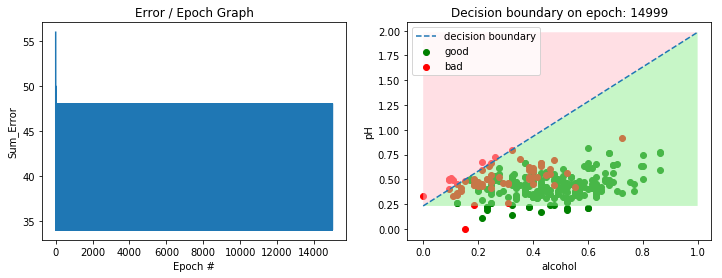

In [28]:
plot_performance(performance, norm_data, good_thresh=7, bad_thresh=4, epoch=-1, save_plot=False)

b) Implement an ADALINE that:

    • Has randomly initialized weights and bias
    • Uses a linear activation function and some kind of quantizer
    • Uses the Widrow-Hoff learning rule

Stochastic Gradient Descent
    
    Gradient Descent is the process of minimizing a function by following the gradients of the cost function.
   
Similarities between perceptron and adaline model:

    * they are both binary classifiers
    * both have a linear decision boundary
    * both can learn iteratively, sample by sample
    * both use a threshold function
    
Difference between perceptron and adaline model
    
    * both are class
    * activation functions returns continuous values or floats between 0 and 1 that are more like probablities
    * These continuous values can be used to learn how close or far this prediction was to the correct value
    

 I WANT TO ACTIVATION TO BE AS CLOSE TO output 1 or 0 and correct itself based off weights
 
 In order to output continuous outputs I need to change prediction function
 

In [29]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        #iterate through inputs and multiply them to corresponding weights
        activation += weights[i + 1] * row[i]
    return activation

In [30]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    performance = []

    #random weights
    weights = [random.uniform(0, 1) for i in range(len(train[0]))]
    
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            probability = predict(row, weights)
            error = row[-1] - probability
            print(error)
            sum_error += abs(error)
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row) - 1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        performance.append((epoch, sum_error, weights[1:], weights[0]))
    if n_epoch <= 0:
        epoch = 0
        sum_error = 1.0
        while sum_error != 0:
            sum_error = 0.0
            for row in train:
                probability = predict(row, weights)
                error = row[-1] - probability
                sum_error += abs(error)
                weights[0] = weights[0] + l_rate * error
                for i in range(len(row) - 1):
                    weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))            
            performance.append((epoch, sum_error, weights[1:], weights[0]))
            epoch += 1 
    print(weights)
    return performance

In [31]:
norm_train

[[0.48031496062992135, 0.676923076923077, 1.0],
 [0.38582677165354323, 0.6461538461538461, 1.0],
 [0.6456692913385828, 0.6923076923076923, 1.0],
 [0.11023622047244074, 0.21538461538461545, 1.0],
 [0.3779527559055119, 0.7692307692307693, 1.0],
 [0.40157480314960625, 0.09230769230769226, 0.0],
 [0.3228346456692912, 0.5076923076923076, 1.0],
 [0.3228346456692912, 0.39999999999999997, 1.0],
 [0.3228346456692912, 0.39999999999999997, 1.0],
 [0.3307086614173229, 0.0, 0.0],
 [0.7716535433070869, 0.8615384615384615, 1.0],
 [0.7007874015748031, 0.3538461538461537, 0.0],
 [0.5669291338582677, 0.6615384615384614, 1.0],
 [0.5039370078740156, 0.23076923076923078, 0.0],
 [0.5826771653543307, 0.39999999999999997, 0.0],
 [0.37007874015748027, 0.6307692307692307, 1.0],
 [0.1889763779527558, 0.5230769230769231, 1.0],
 [0.3622047244094489, 0.723076923076923, 1.0],
 [0.48031496062992135, 0.5076923076923076, 1.0],
 [0.5984251968503937, 0.8615384615384615, 1.0],
 [0.5984251968503937, 0.38461538461538464, 0.

In [32]:
def dataframe_to_list(data, good_threshold, bad_threshold, columns):
    new_data = data.copy()

    #Covert all labels to 1 or 0 with threshold of good and bad
    new_data['good_bad'] = [1 if x >= good_threshold else -1 for x in new_data['quality']]

    #Grab all data higher than 8 or lower than 3 in quality.
    new_data = new_data.loc[(data['quality'] >= good_threshold) | (data['quality'] <= bad_threshold)]

    #Grab only the 3 columns
    test_train = new_data.loc[:, columns]
    test_train = test_train.values.tolist()
    return (test_train)


In [33]:
norm_train = dataframe_to_list(norm_data, good_threshold=8, bad_threshold=3, columns=['pH', 'alcohol', 'good_bad'])
performance = train_weights(norm_train, l_rate=.5, n_epoch=100)

0.5448409341332352
0.11214397218358263
-0.045765878016861494
0.26516031246455596
-0.1381619401392924
-1.8042143487382805
1.1372242534445214
0.4196478520990661
0.15438378492424742
-1.6868248780158812
0.7770702242734251
-1.6268653394564758
1.4146130168158186
-1.3343919468527692
-0.6012493493192486
1.5252200769055289
0.45017453598013635
-0.09906766465453232
0.3250662158157126
-0.436367318215489
-1.3386098793350782
-0.24828838948523158
1.8204594140268366
0.46342541993434994
-1.4874704197980284
-0.6122333594916176
-0.05864664313787271
1.5239847600196588
>epoch=0, lrate=0.500, error=22.452
0.20631379290227803
0.03385536586335114
0.060479802839495056
0.5158586011598655
-0.5555877704448793
-1.086926106986192
0.9121308710982171
0.4654720506354276
0.17124199872369172
-1.2339444547301297
0.2596002893790357
-1.1432943461688807
1.1350092854778318
-1.0312983675321317
-0.6060910020473024
1.1947024833575257
0.34706288057355106
-0.18055116445188402
0.5486765032259855
-0.5938688341044418
-0.979096656079

>epoch=62, lrate=0.500, error=13.197
-0.33054895706899745
-0.28844897553545845
0.7432179793140019
-0.06454963741065334
-1.1339630234569809
0.12628443351276486
0.4180470102040259
0.493779888811105
0.1816561380519981
-0.5130051069765202
0.3457364871484603
-0.458568272102414
0.33838900692739116
-0.6024684810926872
-0.5289722292538905
0.2538180295596537
-0.23779554238831335
-0.12775933911887183
1.1721264956275084
-0.6128531397270085
-0.30409389134294784
-0.03246575638571958
1.612695709756092
-0.08813675029462775
-0.9193438521716071
-0.35571302448390196
0.4671939885240839
0.44574348175817935
>epoch=63, lrate=0.500, error=13.197
-0.3305491910705596
-0.28844935170745023
0.7432188969063813
-0.06455098486741928
-1.1339632522563283
0.126285177876174
0.4180465951681498
0.49377985761823184
0.18165612657648622
-0.5130047091220226
0.3457374889344855
-0.45856798344905414
0.33838819865241
-0.6024683007206776
-0.5289720977341577
0.25381707537558773
-0.23779630636998128
-0.1277591185833853
1.17212712020

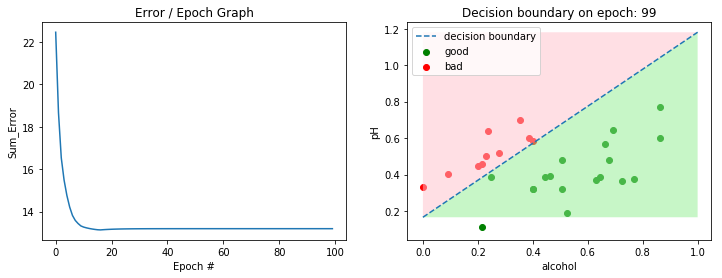

In [34]:
plot_performance(performance, norm_data, good_thresh=8, bad_thresh=3, epoch=99, save_plot=False)

In [35]:
bias = performance[-1][3]
weights = list(performance[-1][2])
print(bias, weights)

weights.insert(0, bias)
print(weights)

for row in test_train:
    prediction = predict(row, weights)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

0.5926529565284981 [-3.573513067995929, 3.625683947432136]
[0.5926529565284981, -3.573513067995929, 3.625683947432136]
Expected=1, Predicted=35
Expected=1, Predicted=34
Expected=1, Predicted=34
Expected=1, Predicted=25
Expected=1, Predicted=37
Expected=0, Predicted=21
Expected=1, Predicted=31
Expected=1, Predicted=29
Expected=1, Predicted=29
Expected=0, Predicted=19
Expected=1, Predicted=38
Expected=0, Predicted=26
Expected=1, Predicted=34
Expected=0, Predicted=24
Expected=0, Predicted=28
Expected=1, Predicted=34
Expected=1, Predicted=32
Expected=1, Predicted=36
Expected=1, Predicted=31
Expected=1, Predicted=38
Expected=0, Predicted=27
Expected=0, Predicted=24
Expected=1, Predicted=25
Expected=1, Predicted=30
Expected=0, Predicted=23
Expected=0, Predicted=25
Expected=0, Predicted=23
Expected=1, Predicted=30
